# Patent analysis for EV

- set 1 is fuel cell
- set 2 is electric vehicle
- set 4 is internal combustion
- set 8 is hybrid

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import nltk

In [5]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### original file complete with powertrain

In [6]:
# use already firm-preprocessed file i.e stage 1
patents=pd.read_csv('patent_firm_full_clean.csv')

In [7]:
patents.shape

(43432, 36)

In [8]:
patents.head()

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee
0,0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,...,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,luz electric fuel israel ltd
1,1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,...,US5208526A\r\nEP0557287A4\r\nUS5349535A\r\nUS5...,US63645090A\r\nEP91915464A\r\nUS96399792A\r\nU...,52393850\r\n16916549\r\n54353461\r\n48212422\r...,27071024\r\n1239277\r\n25508001\r\n22545199\r\...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,luz electric fuel israel ltd
2,2,EP03450043A,16033029,3486548,4,0,1,AT2882002U,2002-05-07,2003-11-19\r\n2004-12-15,...,WO2006116788A2\r\nAT501797B1\r\nDE102009044160...,WO2006000182W\r\nAT7962005A\r\nDE102009044160A...,1389862\r\n973530\r\n275045417\r\n337472147\r\...,36830881\r\n37192146\r\n40373453\r\n43568317\r...,12,AVL List GmbH,AVL List GmbH,Piston for a direct injected spark ignition co...,A piston surface (4) on the combustion chamber...,avl list gmbh
3,3,EP03450044A,16033030,3486548,4,1,1,AT2882002U,2002-05-07,2003-11-19\r\n2004-12-15\r\n2009-11-18,...,WO2005061877A1\r\nWO2006116788A2\r\nAT501797B1...,WO2004052941W\r\nWO2006000182W\r\nAT7962005A\r...,17477694\r\n1389862\r\n973530\r\n275045417,34683624\r\n36830881\r\n37192146\r\n40373453,12,AVL List GmbH,AVL List GmbH,Method for operating a spark ignition four-str...,"During an idling phase, fuel is repeatedly inj...",avl list gmbh
4,4,WO0300172W,856066,3489477,4,0,1,AT3962002U,2002-06-19,2003-12-31,...,DE102009016444A1\r\nDE102012023836A1,DE102009016444A\r\nDE102012023836A,322627657\r\n418472564,42675064\r\n50777672,7,AVL List GmbH,AVL List GmbH,MODULE-LIKE CONSTRUCTED INTERNAL COMBUSTION EN...,The invention relates to a module-like constru...,avl list gmbh


# Loading pickle file from cleaned firm dataset(file :1)

In [9]:
import pickle
#Loading from firm cleaned file
patent = pd.read_pickle('patent_firm_full_clean.pkl')
patent.shape

(43432, 35)

- appln                     The identifier of the application (with letter at the end, seems Google omits that)
- appln_id                  The (internal) patstat identifier of the application
- family_id                 The (internal) patstat identifier of the family that the application is a member of sets  - sets                      Indicate which sets (fuel-cell = 1, electric  vehicle = 2, both = 3) was matched
- direct                    Indicate whether this application was found directly (title/abstract/cpc/ipc) or      indirectly (family association)
- granted                   Whether or not the application was granted
- earliest_appln            Per family, the earliest application
- earliest_filing_date      The date of the family's earliest application
- publn                     Identifiers of publications associated with this application (*)
- publn_date                The dates of associated publications (*)
- publn_first_grant         Indicates for each publication if its the first one with granted status
- num_cpc_class             The number of CPC classes for this application
- cpc_class                 The CPC class symbols for this application
- num_ipc_class             The number of IPC classes for this application
- ipc_class                 The IPC class symbols for this application
- num_cited_publn           The number of forward citations (this applications refers to other publications)
- cited_publn_date          The dates of cited publications (**)
- cited_publn               The identifiers of cited publications (**)
- cited_appln               The identifiers of the applications  associated with cited publications (**)
- cited_appln_id            The (internal) patstat identifiers of the  applications associated with cited publications (**)
- cited_family_id           The (internal) patstat identifiers of the  family associated with cited publications (**)
- num_cited_family          The total number of distinct families  associated with cited publications (***)
- num_citing_publn          The number of backward citations (other  publications refer to this application)
- citing_publn_date         The dates of citing publications (**)
- citing_publn              The identifiers of citing publications (**)
- citing_appln              The identifiers of the applications  associated with citing publications (**)
- citing_appln_id           The (internal) patstat identifiers of the  applications associated with citing publications (**)
- citing_family_id          The (internal) patstat identifiers of the  family associated with citing publications (**)
- num_citing_family         The total number of distinct families  associated with citing publications (***)
- earliest_applt            The name of the (first) applicant of the  earliest publication of this application 
- current_applt             The name of the (first) applicant of the most recent publication of this application
- appln_title               The title of this application
- assignee                  Cleaning and preprocessed firm titles (^)
>>
>> (*/**) These are one per line, in consistent order


>> (***) These seem to be the numbers that google uses to count citations. You can get this from the export if you aggregate all applications within a family and discard duplicates.

>> (^) This column is taken from previous file i.e File1-Firm_Preprocessing




# 1) Exploring data

### 1.1)-Types of features in our dataset

In [10]:
patent.dtypes.value_counts()

object    24
int64     11
dtype: int64

In [11]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(patent)
table_dtype

,Data Type
appln_id,int64
family_id,int64
sets,int64
direct,int64
granted,int64
num_citing_publn,int64
num_cited_publn,int64
num_citing_family,int64
num_cited_family,int64
num_cpc_class,int64


### 1.2)-Checking missing values

In [12]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [13]:
missing_values = find_missing_values(patent, columns=patent.columns)
missing_values

Number of missing or NaN values for each column:


{'appln': 0,
 'appln_id': 0,
 'family_id': 0,
 'sets': 0,
 'direct': 0,
 'granted': 0,
 'earliest_appln': 0,
 'earliest_filing_date': 0,
 'publn_date': 0,
 'publn': 0,
 'publn_first_grant': 0,
 'publn_claims': 0,
 'num_cpc_class': 0,
 'cpc_class': 4146,
 'num_ipc_class': 0,
 'ipc_class': 33,
 'num_cited_publn': 0,
 'cited_publn_date': 14334,
 'cited_publn': 14334,
 'cited_appln': 14334,
 'cited_appln_id': 14334,
 'cited_family_id': 14334,
 'num_cited_family': 0,
 'num_citing_publn': 0,
 'citing_publn_date': 16123,
 'citing_publn': 16123,
 'citing_appln': 16123,
 'citing_appln_id': 16123,
 'citing_family_id': 16123,
 'num_citing_family': 0,
 'earliest_applt': 235,
 'current_applt': 235,
 'appln_title': 0,
 'appln_abstr': 0,
 'assignee': 235}

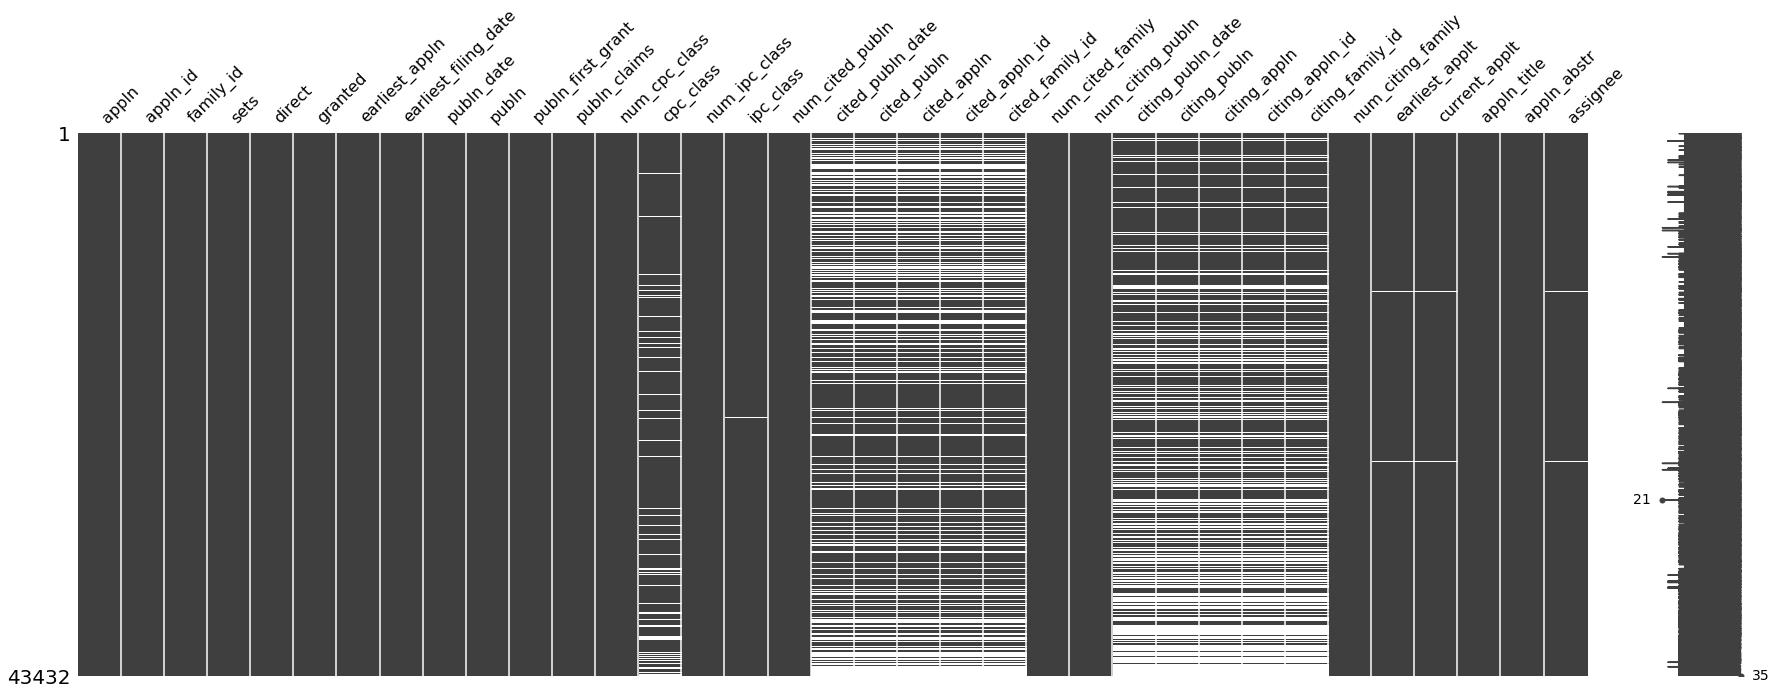

In [14]:
import missingno
missingno.matrix(patent, figsize = (30,10))

In [15]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(patent)

No. of fields:  43432
No. of missing fields:  15


,No. of mising Value,%age of missing Value
citing_family_id,16123,37.1
citing_appln_id,16123,37.1
citing_appln,16123,37.1
citing_publn,16123,37.1
citing_publn_date,16123,37.1
cited_publn_date,14334,33.0
cited_family_id,14334,33.0
cited_appln_id,14334,33.0
cited_appln,14334,33.0
cited_publn,14334,33.0


In [16]:
patent.sets.value_counts()

2     18157
8     11797
1      6116
4      4281
10     2528
12      270
3       131
9        43
14       40
6        29
11       26
5        14
Name: sets, dtype: int64

- set 1 is fuel cell and contains 6116 values
- set 2 is electric vehicle and contains 18157 values
- set 4 is internal combustion and contains 4281 values
- set 8 is hybrid and contains 11797 values

### 1.3)- Duplicate values

In [17]:
patent_abst=patent['appln_abstr']

In [18]:
#patent.appln_abstr.duplicated()
patent_abst.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21        True
22        True
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
43402    False
43403    False
43404    False
43405    False
43406    False
43407    False
43408    False
43409    False
43410    False
43411    False
43412    False
43413    False
43414    False
43415    False
43416    False
43417    False
43418    False
43419    False
43420    False
43421    False
43422    False
43423    False
43424    False
43425    False
43426    False
43427    False
43428    False
43429    False
43430    False
43431    False
Name: appln_abstr, Length: 43432, dtype: bool

In [19]:
patent_abst.duplicated().sum()

6235

In [20]:
#patent.loc[patent.appln_abstr.duplicated
patent_abst.loc[patent_abst.duplicated()]

21       A method for the thermal management of a fuel ...
22       A method for the thermal management of a fuel ...
32       An energy distribution network for providing h...
35       An energy distribution network for providing h...
36       An energy distribution network for providing h...
41       A hydrogen fuel supply system includes a hydro...
42       A hydrogen fuel supply system includes a hydro...
43       A hydrogen fuel supply system includes a hydro...
44       An energy distribution network for providing h...
48       The system includes a permanent magnet three-p...
78       The object of the invention is to provide a fi...
122      The invention is directed to a method and an a...
224      The invention relates to a method for engine m...
248      The engine crank casing (1) has oil pressure b...
255      The fuel cell system has at least one fuel cel...
260      The invention relates to an internal combustio...
296      The invention relates to a method for producin.

In [21]:
# mark duplicates as true except 1st occurance.So, all 1st values are keep and all others are identified as duplicates.
#We can change as 'last'
patent.loc[patent.appln_abstr.duplicated(keep= False), :]

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee
20,WO0300609W,1398375,3836014,1,1,0,AUPS244802A,2002-05-21,2003-11-27,WO03098728A1,...,DE102005054713A1\nJP2006261025A\nEP1416566A3\n...,DE102005054713A\nJP2005079294A\nEP03021068A\nJ...,15010937\n38857048\n16008347\n39634306\n546624...,36390110\n37100009\n32086889\n32011639\n385698...,37,Ceramic Fuel Cells Limited,Ceramic Fuel Cells Limited,FUEL CELL SYSTEM,A method for the thermal management of a fuel ...,ceramic fuel cells limited
21,CA2486706A,4864586,3836014,1,1,1,AUPS244802A,2002-05-21,2003-11-27\n2011-04-19,CA2486706A1\nCA2486706C,...,NaN,NaN,NaN,NaN,37,Ceramic Fuel Cells Limited,Ceramic Fuel Cells Limited,METHOD AND SYSTEM FOR THERMAL MANAGEMENT OF A ...,A method for the thermal management of a fuel ...,ceramic fuel cells limited
22,US51484203A,338887252,3836014,1,1,1,AUPS244802A,2002-05-21,2005-08-18\n2011-11-15,US2005181247A1\nUS8057947B2,...,US2006292410A1\nDE102006014197A1\nUS2007287038...,US47551406A\nDE102006014197A\nUS57232505A\nUS9...,51177556\n15028082\n51920944\n54211679\n520413...,37567823\n38460084\n34982574\n38895743\n393448...,37,"Foger, Karl","Foger, Karl",Thermal management of a fuel cell system,A method for the thermal management of a fuel ...,foger karl
30,WO0000488W,4321546,4163541,1,1,1,CA2271448A,1999-05-12,2000-11-23,WO0069773A1,...,WO03032425A1\nGB2385582A\nEP1241062A3\nUS67676...,WO0210264W\nGB0223346A\nEP02001756A\nUS2424701...,25487452\n21393789\n15900187\n45972073\n497497...,26623590\n19143784\n7677833\n7677833\n23363238...,126,STUART ENERGY SYSTEMS CORPORATION,STUART ENERGY SYSTEMS CORPORATION,ENERGY DISTRIBUTION NETWORK,An energy distribution network for providing h...,stuart energy systems corporation
32,CA2370031A,4737095,4163541,1,1,1,CA2271448A,1999-05-12,2000-11-23\n2014-12-09,CA2370031A1\nCA2370031C,...,US8057646B2,US72109805A,267285772,36577637,126,STUART ENERGY SYSTEMS CORPORATION,STUART ENERGY SYSTEMS CORPORATION,ENERGY DISTRIBUTION NETWORK,An energy distribution network for providing h...,stuart energy systems corporation
35,KR20057011813A,40900462,4163541,1,1,0,CA2271448A,1999-05-12,2005-08-26,KR20050084477A,...,NaN,NaN,NaN,NaN,126,STUART ENERGY SYSTEMS CORPORATION,STUART ENERGY SYSTEMS CORPORATION,"HYDROGEN FUEL SUPPLY SYSTEM, HYDROGEN FUELING ...",An energy distribution network for providing h...,stuart energy systems corporation
36,MXPA01011403A,41305985,4163541,1,1,0,CA2271448A,1999-05-12,2002-04-24,MXPA01011403A,...,NaN,NaN,NaN,NaN,126,STUART ENERGY SYSTEMS CORPORATION,STUART ENERGY SYSTEMS CORPORATION,ENERGY DISTRIBUTION NETWORK.,An energy distribution network for providing h...,stuart energy systems corporation
40,US74085303A,53150528,4163541,1,0,1,CA2271448A,1999-05-12,2004-07-08\n2009-07-21,US2004131508A1\nUS7565224B2,...,US2003040847A1\nUS2005056661A1\nUS2005145505A1...,US15208802A\nUS92135304A\nUS5612905A\nUS561290...,48205325\n54155925\n46520726\n46520726\n482053...,26849248\n34193355\n4163541\n4163541\n26849248...,126,Stuart Energy Systems Corp.,Stuart Energy Systems Corp.,Energy distribution network,A hydrogen fuel supply system includes a hydro...,stuart energy systems corp
41,US82943404A,53690279,4163541,1,0,0,CA2271448A,1999-05-12,2004-10-07,US2004199294A1,...,US2004181298A1\nUS7065414B2\nUS2010275147A1\nU...,US38506603A\nUS38506603A\nUS42988109A\nUS42983...,50471511\n50471511\n328382337\n328382009\n3283...,32961425\n32961425\n42676810\n42556702\n422890...,126,FAIRLIE MATTHEW J.,FAIRLIE MATTHEW J.,Energy distribution network,A hydrogen fuel supply system includes a hydro...,fairlie matthew j
42,US82943504A,53690283,4163541,1,0,1,CA2271448A,1999-05-12,2004-10-07\n2005-06-28,US2004199295A1\nUS6912450B2,...,US2002149265A1\nUS2005188614A1\nUS2006118575A1...,US11868502A\nUS1523804A\nUS23443105A\nUS172652...,47793028\n45817136\n488

In [22]:
len(patent_abst.loc[patent_abst.duplicated()])

6235

### 1.4) checking duplicate value for text i.e abstract and title (combination)

In [23]:
patent.duplicated(subset=['appln_abstr','appln_title']).sum()

2621

Clearly, there is a decrease from 6235 when we only used abstract to 2621 when we added title as well.

In [24]:
patent.duplicated(subset=['appln_abstr','appln']).sum()

0

In [25]:
patent.duplicated(subset=['appln_title','appln']).sum()

0

**Overall there are no duplicate values. There are some patents with same abstract as they might belong to same family, or different pub. ID (JP,US,EU)**

### To drop duplicate values

patent.appln_abstr.drop_duplicates(keep='first')<br>
patent.shape

If we want to drop duplicate values from both abstract and title then

patent.drop_duplicates(subset=['appln_abstr','appln_title']) <br>
patent.shape

# 2) Comparing groups

In [26]:
patent['granted'][:5]

0    1
1    1
2    1
3    1
4    1
Name: granted, dtype: int64

In [27]:
patent['granted'].value_counts()

1    32958
0    10474
Name: granted, dtype: int64

In [30]:
patent['assignee'].value_counts()[:30]

toyota motor corp                                     5680
honda motor ltd                                       2662
hyundai motor company                                 2190
nissan motor co ltd                                   1904
ford global technologies llc                          1296
mitsubishi motors corp                                 847
robert bosch gmbh                                      557
hitachi automotive systems ltd                         481
aisin seiki co ltd                                     405
denso corporation                                      380
suzuki motor corp                                      359
general motors corporation                             346
renault sas                                            287
peugeot citroen automobiles sa                         244
lsis co  ltd                                           222
daimler ag                                             212
panasonic corporation                                  1

**We have a cleaned column with all firms pre-processed data so, lets use that**

In [31]:
value_counts = patents['assignee'].value_counts(dropna=True, sort=True)
data = value_counts.rename_axis('unique_values').reset_index(name='counts')
df_val_counts = pd.DataFrame(data)
df_val_counts[:40]

,unique_values,counts
0,toyota motor corp,5680
1,honda motor ltd,2662
2,hyundai motor company,2190
3,nissan motor co ltd,1904
4,ford global technologies llc,1296
5,mitsubishi motors corp,847
6,robert bosch gmbh,557
7,hitachi automotive systems ltd,481
8,aisin seiki co ltd,405
9,denso corporation,380


In [32]:
p=patent
p['assignee'].value_counts()[:20]

toyota motor corp                 5680
honda motor ltd                   2662
hyundai motor company             2190
nissan motor co ltd               1904
ford global technologies llc      1296
mitsubishi motors corp             847
robert bosch gmbh                  557
hitachi automotive systems ltd     481
aisin seiki co ltd                 405
denso corporation                  380
suzuki motor corp                  359
general motors corporation         346
renault sas                        287
peugeot citroen automobiles sa     244
lsis co  ltd                       222
daimler ag                         212
panasonic corporation              198
mazda motor corp                   194
sony corporation                   192
general electric company           183
Name: assignee, dtype: int64

In [33]:
# suppose we want to see how many patents are granted to Hyundai Motor Company 

p[p.assignee == 'Hyundai Motor Company'].granted.value_counts()

Series([], Name: granted, dtype: int64)

In [34]:
p[p.assignee =='mitsubishi motors corp'].granted.value_counts()

1    638
0    209
Name: granted, dtype: int64

In [35]:
# if we wanna see %age
p[p.assignee =='mitsubishi motors corp'].granted.value_counts(normalize=True)

1    0.753247
0    0.246753
Name: granted, dtype: float64

In [36]:
# Use groupby
p.groupby('granted').assignee.value_counts(normalize=True)

granted  assignee                                                       
0        toyota motor corp                                                  0.145693
         hyundai motor company                                              0.049624
         nissan motor co ltd                                                0.037965
         honda motor ltd                                                    0.035652
         ford global technologies llc                                       0.032087
         robert bosch gmbh                                                  0.024378
         mitsubishi motors corp                                             0.020139
         renault sas                                                        0.013105
         sony corporation                                                   0.011370
         hitachi automotive systems ltd                                     0.010792
         aisin seiki co ltd                                                 0

# 3)- Working with time series


- Remove 2018 
- Check which year has least and most patents granted <br>
- earliest_filing_date= no. of patents' application

In [37]:
filling_date= patent.earliest_filing_date

In [38]:
dtype(filling_date)

dtype('O')

It's an object. We need to convert into datetime object

In [39]:
patent['application_date']= pd.to_datetime(filling_date)

In [40]:
dtype(patent.application_date)

dtype('<M8[ns]')

Now we have it. Let's see what it contains

In [41]:
patent.application_date[:5]

0   1990-07-19
1   1990-07-19
2   2002-05-07
3   2002-05-07
4   2002-06-19
Name: application_date, dtype: datetime64[ns]

We only are interested in year. No need for date, weeks or months for now.

In [42]:
patent.application_date.dt.year

0        1990
1        1990
2        2002
3        2002
4        2002
5        2002
6        2002
7        1991
8        1991
9        1994
10       1993
11       1993
12       1991
13       1995
14       1992
15       1995
16       1995
17       1995
18       2002
19       2002
20       2002
21       2002
22       2002
23       1993
24       1994
25       1997
26       1996
27       1996
28       1999
29       1999
         ... 
43402    2017
43403    2016
43404    2017
43405    2017
43406    2017
43407    2017
43408    2017
43409    2017
43410    2017
43411    2017
43412    2016
43413    2016
43414    2016
43415    2016
43416    2016
43417    2016
43418    2016
43419    2017
43420    2017
43421    2017
43422    2016
43423    2016
43424    2016
43425    2017
43426    2014
43427    2017
43428    2016
43429    2014
43430    2014
43431    2014
Name: application_date, Length: 43432, dtype: int64

### 3.1 )-Removing 2018 from dataset

 **check how many patents 2018 year has **

In [43]:
patent[patent.application_date.dt.year== 2018]

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date
43242,AU2018100117A,490768723,61249370,4,1,1,AU2018100117A,2018-01-26,2018-03-01,AU2018100117A4,...,NaN,NaN,NaN,0,ECODRIVE SOLUTIONS LIMITED,ECODRIVE SOLUTIONS LIMITED,IMPROVED OPPOSED-PISTON INTERNAL COMBUSTION EN...,An improved engine directed to a Low friction ...,ecodrive solutions limited,2018-01-26


In [44]:
# Remove only one row with year 2018
patent.drop([43242], axis=0, inplace=True)

In [45]:
patent[patent.application_date.dt.year== 2018]

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date


In [46]:
patent.shape

(43431, 36)

**From 43432, we have now 42431**

In [47]:
patent['year']=patent['application_date'].dt.year

In [48]:
patent.year[:5]

0    1990
1    1990
2    2002
3    2002
4    2002
Name: year, dtype: int64

In [49]:
patent.year.value_counts().sort_index()

1990      96
1991     146
1992     310
1993     417
1994     384
1995     469
1996     500
1997     622
1998     682
1999     882
2000     914
2001    1038
2002    1113
2003    1291
2004    1208
2005    1375
2006    1943
2007    2193
2008    2016
2009    2584
2010    3454
2011    4594
2012    4036
2013    3507
2014    3070
2015    2646
2016    1619
2017     322
Name: year, dtype: int64

In [50]:
patent.year.value_counts(ascending=True)

1990      96
1991     146
1992     310
2017     322
1994     384
1993     417
1995     469
1996     500
1997     622
1998     682
1999     882
2000     914
2001    1038
2002    1113
2004    1208
2003    1291
2005    1375
2016    1619
2006    1943
2008    2016
2007    2193
2009    2584
2015    2646
2014    3070
2010    3454
2013    3507
2012    4036
2011    4594
Name: year, dtype: int64

In [51]:
#We can even pick least patent year
patent.year.value_counts().sort_values().index[0]

1990

In [52]:
# For highest year
patent.year.value_counts().index[0]

2011

### Alternative method

In [53]:
patent.earliest_filing_date.str.slice(0,4)

0        1990
1        1990
2        2002
3        2002
4        2002
5        2002
6        2002
7        1991
8        1991
9        1994
10       1993
11       1993
12       1991
13       1995
14       1992
15       1995
16       1995
17       1995
18       2002
19       2002
20       2002
21       2002
22       2002
23       1993
24       1994
25       1997
26       1996
27       1996
28       1999
29       1999
         ... 
43402    2017
43403    2016
43404    2017
43405    2017
43406    2017
43407    2017
43408    2017
43409    2017
43410    2017
43411    2017
43412    2016
43413    2016
43414    2016
43415    2016
43416    2016
43417    2016
43418    2016
43419    2017
43420    2017
43421    2017
43422    2016
43423    2016
43424    2016
43425    2017
43426    2014
43427    2017
43428    2016
43429    2014
43430    2014
43431    2014
Name: earliest_filing_date, Length: 43431, dtype: object

In [54]:
patent.earliest_filing_date.str.slice(0,4).value_counts()

2011    4594
2012    4036
2013    3507
2010    3454
2014    3070
2015    2646
2009    2584
2007    2193
2008    2016
2006    1943
2016    1619
2005    1375
2003    1291
2004    1208
2002    1113
2001    1038
2000     914
1999     882
1998     682
1997     622
1996     500
1995     469
1993     417
1994     384
2017     322
1992     310
1991     146
1990      96
Name: earliest_filing_date, dtype: int64

In [55]:
#We can even pick least patent year
patent.application_date.dt.year.value_counts().sort_values().index[0]

1990

In [56]:
# For highest year
patent.application_date.dt.year.value_counts().index[0]

2011

### saving as pickle

In [57]:
patent.to_pickle('eda.pkl')

In [58]:
load = pd.read_pickle('eda.pkl')
load.shape

(43431, 37)

In [60]:
patent.to_csv('eda.csv', index="False")

**We have added two new columns i.e application_date and year**

### Plotting is not part of this notebook

In [61]:
dataset=pd.read_csv('eda.csv')

In [62]:
dataset.shape

(43431, 38)

In [63]:
dataset.head()

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date,year
0,0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,...,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990
1,1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,...,52393850\r\n16916549\r\n54353461\r\n48212422\r...,27071024\r\n1239277\r\n25508001\r\n22545199\r\...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990
2,2,EP03450043A,16033029,3486548,4,0,1,AT2882002U,2002-05-07,2003-11-19\r\n2004-12-15,...,1389862\r\n973530\r\n275045417\r\n337472147\r\...,36830881\r\n37192146\r\n40373453\r\n43568317\r...,12,AVL List GmbH,AVL List GmbH,Piston for a direct injected spark ignition co...,A piston surface (4) on the combustion chamber...,avl list gmbh,2002-05-07,2002
3,3,EP03450044A,16033030,3486548,4,1,1,AT2882002U,2002-05-07,2003-11-19\r\n2004-12-15\r\n2009-11-18,...,17477694\r\n1389862\r\n973530\r\n275045417,34683624\r\n36830881\r\n37192146\r\n40373453,12,AVL List GmbH,AVL List GmbH,Method for operating a spark ignition four-str...,"During an idling phase, fuel is repeatedly inj...",avl list gmbh,2002-05-07,2002
4,4,WO0300172W,856066,3489477,4,0,1,AT3962002U,2002-06-19,2003-12-31,...,322627657\r\n418472564,42675064\r\n50777672,7,AVL List GmbH,AVL List GmbH,MODULE-LIKE CONSTRUCTED INTERNAL COMBUSTION EN...,The invention relates to a module-like constru...,avl list gmbh,2002-06-19,2002


# 4 Text Mining

In [64]:
patent_abst=patent['appln_abstr']

In [65]:
chars = list(set(patent_abst)) 
data_size, vocab_size = len(patent_abst), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 43431
Patent data has unique chars 37196


**still there are alot of unique letters. Seems like patents do use key words alot**